In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


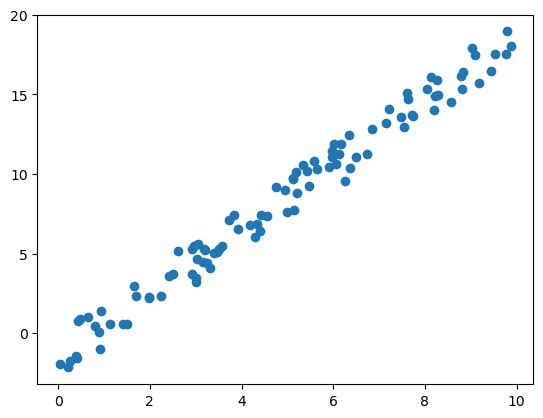

In [2]:
'''
6. 사이킷런의 주요 모듈 (2) 회귀 모델 실습
예제 데이터와 머신러닝의 회귀 모델을 이용해 데이터를 예측하는 모델을 만들어 보겠습니다.
예제 데이터는 yn이라는 라벨 값을 각각 가지는 입력 데이터 xn 100개로 구성되어 있습니다.
'''

import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [3]:
'''
입력 데이터 x와 정답 데이터 y의 모양을 확인해 보도록 합시다.
'''

x.shape

(100,)

In [4]:
y.shape

(100,)

In [5]:
'''
x와 y의 모양은 (100,)으로 1차원 벡터입니다.

사이킷런에서 머신러닝 모델을 사용하기 위해서 우선 모델 객체를 생성해 줍니다.
지금 예제에서 사용할 모델의 이름은 LinearRegression 이며, 이것은 sklearn.linear_model 안에 있습니다.
'''

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [6]:
'''
LinearRegression 모델이 잘 생성되었습니다.
이 모델을 훈련시킵니다. 훈련시키는 메서드는 fit()이라고 하는 메서드입니다.

fit()메서드에 인자로 특성 행렬과 타겟 벡터를 넣어 줍니다.
즉, 행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어 줍니다.

위의 입력 데이터인 x를 그대로 넣으면, 에러가 발생합니다.
x를 행렬로 바꾸어 주어야 합니다. 행렬로 어떻게 바꾸면 좋을까요?
x는 numpy의 ndarray타입이니 reshape()를 사용하면 좋을 것 같네요.
통상 특성 행렬의 변수명은 X로 한다고 했습니다. 변수명 X에 특성 행렬을 넣어 봅시다.
'''

# ! 에러 발생
# model.fit(x, y)

X = x.reshape(100,1)

In [7]:
'''
자 이제 X를 fit()의 인자로 넣어줍니다.
'''

model.fit(X,y)

LinearRegression()

In [8]:
'''
입력 데이터와 그 라벨을 이용해 훈련을 완료했습니다. 이제 새로운 데이터를 넣고 예측을 한번 해볼까요?
새로운 데이터는 np.linspace()를 이용해서 생성합시다. 예측은 predict()를 사용합니다.
predict()의 인자 역시 행렬로 넣어 주어야 합니다.
'''

x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

In [9]:
'''
잠깐 Tip!

reshape() 함수에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자를 계산해 줍니다.
즉, x_new의 인자의 개수가 100개이므로, (100, 1)의 형태나 (2, 50)의 형태 등으로 변환해 줄 수 있는데요.
(2, -1)을 인자로 넣으면 (2, 50)의 형태로 자동으로 변환해 줍니다. 아래 코드를 통해 확인해 보세요.
'''

X_ = x_new.reshape(-1,1)
X_.shape

(100, 1)

In [10]:
'''
학습된 회귀 모델이 잘 예측했는지 모델의 성능을 평가해 보도록 하겠습니다.
앞에서 간단히 소개하였듯이 모델의 성능 평가 관련 모듈은 sklearn.metrics에 저장되어 있습니다.
회귀 모델의 경우 RMSE(Root Mean Square Error) 를 사용해 성능을 평가합니다.

사이킷런의 RMSE 오차 관련 함수의 스펙을 직접 확인해 보고 코드로 구현해 보세요.
(힌트! mean_squared_error 함수의 공식을 유심히 보세요. np.sqrt를 활용해 보세요.)
'''

# Q. 아래 mse를 구하는 과정을 직접 구현해보세요.
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y,y_new))

print(error)

9.299028215052262


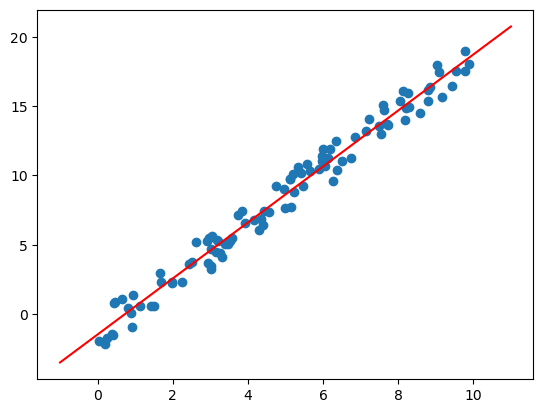

In [11]:
'''
확인해 보셨나요? 좀 더 직관적으로 확인하기 위해 그래프로 한번 그려보겠습니다.
그래프의 점들과 회귀선이 거의 일치하네요.
'''

plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

In [12]:
'''
7. 사이킷런의 주요 모듈 (3) datasets 모듈
사이킷런은 데이터셋을 모듈로 제공하고 있으며 데이터에 대한 내용은 아래 공식 문서를 참고하세요.

sklearn.datasets 모듈은 크게 dataset loaders와 dataset fetchers로 나뉘며,
각각 Toy dataset과 Real World dataset을 제공하고 있습니다. 우리는 Toy dataset을 다뤄볼 예정입니다.

Toy dataset의 예시입니다.
datasets.load_boston(): 회귀 문제, 미국 보스턴 집값 예측(version 1.2 이후 삭제 예정)
datasets.load_breast_cancer(): 분류 문제, 유방암 판별
datasets.load_digits(): 분류 문제, 0 ~ 9 숫자 분류
datasets.load_iris(): 분류 문제, iris 품종 분류
datasets.load_wine(): 분류 문제, 와인 분류
우리는 와인 데이터셋을 이용하겠습니다.

datasets.load_wine() 뜯어보기
와인 분류 데이터를 다운로드한 다음 data란 변수에 할당합니다. 그리고 자료형을 한번 확인해 보세요.
'''

from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils._bunch.Bunch

In [13]:
'''
sklearn.utils.Bunch라고 하는 데이터 타입이네요? 이 타입이 무엇인지 공식 문서를 통해 확인해 봅시다.
Bunch는 파이썬의 딕셔너리와 유사한 형태의 데이터 타입입니다.
'''

print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [14]:
'''
data를 출력해 보면 데이터들이 중괄호에 {} 담겨있고 콜론 : 을 이용해서 구분되어 있습니다.
바로 key와 value입니다. 번치 데이터 타입에도 파이썬의 딕셔너리 메서드인 keys()를 사용할 수 있어요.
'''

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [15]:
'''
어떤 값들이 나왔나요? 이 데이터의 각 키값이 의미하는 것이 무엇인지 하나씩 알아보도록 하겠습니다.

1. data
키값 data는 특성 행렬입니다. 파이썬의 딕셔너리와 유사하다고 했죠? 키에 접근하기 위해서 .을 사용할 수 있습니다. 한 번 확인해 보세요.
'''

data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [16]:
'''
특성 행렬은 2차원이며 행에는 데이터의 개수(n_samples)가 열에는 특성의 개수(n_features)가 들어 있습니다. 모양을 확인해 보죠.
'''

data.data.shape

(178, 13)

In [17]:
'''
(178, 13)이 나오네요. 즉, 특성이 13개, 데이터가 178개인 특성 행렬이 나왔습니다.
ndim을 이용해 차원을 확인할 수 있습니다.
'''

data.data.ndim

2

In [18]:
'''
2. target
키값 target은 뭘까요? 예측하셨겠지만 타겟 벡터입니다.
'''

data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
'''
타겟 벡터는 1차원입니다. 그리고 타겟 벡터의 길이는 특성 행렬의 데이터 개수와 일치해야 합니다. 정말 그럴까요? 모양을 확인해 봅시다.
'''

data.target.shape

(178,)

In [20]:
'''
(178, ) 이 나오네요. 특성 행렬의 데이터 수와 일치합니다.

3. feature_names
data 키에 접근해서 data의 값을 확인해 본 결과 특성이 13개임을 확인했습니다.
그럼 이 특성들의 이름이 뭔지 알아야겠죠? feature_names란 키에 특성들의 이름이 저장되어 있습니다.
'''

data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [21]:
'''
feature_names들이 저장되어 있네요, 전 와인에 대해 잘 몰라서... feature_names들이 무엇을 의미하는지 검색해 봐야 할 것 같아요.
그렇지만 feature의 개수 정도는 간단히 확인이 가능합니다. 내장함수 len()을 이용해서 확인해 봅시다.
'''

len(data.feature_names)

13

In [22]:
'''
feature_names의 개수와 특성 행렬의 n_features(열)의 숫자가 일치하네요.

4. target_names
target_names는 분류하고자 하는 대상입니다.
'''

data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [23]:
'''
출력값을 확인해 보니 다음과 같이 나옵니다.
array(['class_0', 'class_1', 'class_2'], dtype='<U7')
데이터를 각각 class_0과 class_1, class_2로 분류한다는 뜻입니다.
와인의 종류가 상세하게 무엇을 의미하는지는 모르지만 각각 0번 와인, 1번 와인, 2번 와인으로 분류를 하는 문제네요.
(와인 종류는 굳이 안 찾아보셔도 됩니다.)

5. DESCR
DESCR은 describe의 약자로 데이터에 대한 설명이에요.
'''

print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [24]:
'''
8. 사이킷런의 주요 모듈 (4) 사이킷런 데이터셋을 이용한 분류 문제 실습
DataFrame으로 나타내기
특성 행렬을 Pandas의 DataFrame으로 나타낼 수 있다고 했습니다.
'''

import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [25]:
'''
DataFrame으로 나타내니 한결 데이터 보기가 편해졌습니다. 이렇게 하면 EDA(Exploration Data Analysis)할 때 굉장히 편할 것 같네요.

머신러닝
이제 머신러닝 모델을 만들고 예측을 해보겠습니다.

특성 행렬은 통상 변수명 X에 저장하고, 타겟 벡터는 y에 저장한다고 했습니다.
'''

X = data.data
y = data.target

In [26]:
'''
모델을 생성합니다. 이번에는 분류 문제이므로 RandomForestClassifier를 사용해 보겠습니다.
'''

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [27]:
'''
훈련을 시킵니다.
'''

model.fit(X, y)

RandomForestClassifier()

In [28]:
'''
예측을 합니다.
'''

y_pred = model.predict(X)

In [29]:
'''
그리고 성능을 평가해 보도록 하겠습니다. 성능은 sklearn.metrics 모듈을 사용한다고 했습니다.
분류 문제의 경우 classification_report 와 accuracy_score를 이용합니다.
'''

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다.
print(classification_report(y, y_pred))
#정확도를 출력합니다.
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


In [30]:
'''
훈련 데이터와 테스트 데이터 분리하기
앞의 와인 분류 문제에서 정확도가 100%로 나온 것을 기억하시나요?
위의 그림에서 Estimator 객체에 fit()과 prediction() 메서드에 인자로 각기 다른 데이터가 들어가야 하는 것을 눈치채셨나요?

처음에 우리는 아래 그림과 같이 훈련에 사용되는 데이터(특성 행렬)와 예측에 사용되는 데이터(특성 행렬)에 같은 값을 넣었습니다.
즉, 동일한 데이터로 훈련과 예측을 하니 정확도가 100% 로 나왔습니다.

훈련 데이터와 테스트 데이터 직접 분리하기
보통 훈련 데이터와 테스트 데이터의 비율은 8:2로 설정합니다. 자 그럼 데이터를 나누어 보겠습니다.
'''

from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [31]:
'''
전체 데이터의 개수는 178개입니다. 8 대 2로 특성 행렬과 타겟 벡터를 나누어 보도록 하겠습니다.
데이터의 개수이므로 정수만 가능하죠.
178개의 80%면 142.4이지만 정수로 표현해 142개, 그리고 훈련 데이터는 나머지 36개로 나누어 보겠습니다.

특성 행렬과 타겟 벡터는 ndarray type이니 numpy의 슬라이싱을 사용하면 될 것 같네요.
'''

X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [32]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


In [33]:
'''
훈련 데이터와 테스트 데이터의 분리가 끝났습니다. 그럼 다시 훈련과 예측을 해보겠습니다.
'''

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = model.predict(X_test)

In [35]:
'''
정확도를 평가해 볼까요?
'''

from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222


In [36]:
'''
train_test_split() 사용해서 분리하기
훈련 데이터와 테스트 데이터 분리는 필수 기능입니다. 훈련에 쓴 데이터를 예측에 사용하면 항상 정확도는 100%가 나올 것이기 때문이죠.
사이킷런에서는 이 필수 기능을 당연히 API로 제공하고 있습니다. 바로 model_selection의 train_test_split() 함수입니다.
'''

from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
'''
인자로 특성 행렬 X와 타겟 벡터 y를 넣고 테스트 데이터의 비율을 넣어 키워드 인자로 지정해 줍니다.
20%로 해 볼게요. 그리고 우리는 0번부터 순차적으로 데이터를 분할했죠? 사이킷런은 랜덤하게 데이터를 섞어주는 기능도 있습니다.
random_state 인자에 seed 번호를 입력하면 됩니다. seed 번호는 임의로 결정할 수 있고,
같은 seed 번호를 사용하면 언제든 같은 결과를 얻을 수 있습니다.

train_test_split()은 반환값으로 4개의 원소로 이루어진 list를 반환합니다. (*리스트 원소의 데이터 타입은 array입니다.)
'''

print(type(result))
print(len(result))

<class 'list'>
4


In [38]:
'''
각각 모양을 확인해 볼까요?
'''

result[0].shape

(142, 13)

In [39]:
result[1].shape

(36, 13)

In [40]:
result[2].shape

(142,)

In [41]:
result[3].shape

(36,)

In [42]:
'''
모양을 보니 감이 잡히시나요? 네 0번 원소부터 순서대로 훈련 데이터용 특성 행렬, 테스트 데이터용 특성 행렬,
훈련 데이터용 타겟 벡터, 테스트 데이터용 타겟 벡터입니다.

우리는 이 함수를 이런 식으로 unpacking 해서 씁니다.
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
'''
실습
그럼 앞서 와인 분류 문제의 데이터를 훈련용 데이터셋과 테스트용 데이터셋으로 나눈 뒤 훈련하고 예측하는 전체 코드를 직접 작성해 보세요.

와인 데이터가 간단하기 때문에 training/test 데이터가 어떻게 나누어지는가에 따라서 데이터를 분리했는데도 정확도 100%가 나올 수도 있습니다.
random seed 번호를 지정하지 않은 경우 코드를 여러 번 실행시켜 보면 정확도가 다르게 나올 것입니다.
'''

# Q. 위에서 배운 내용을 토대로 내용을 정리해서 아래의 [[YOUR CODE]]를 완성해주세요.
# 데이터셋 로드하기
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 훈련하기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
from sklearn.metrics import accuracy_score
print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222
